In [63]:
import pandas as pd
# NeuralProphet 클래스 불러오기
from neuralprophet import NeuralProphet, set_log_level
from neuralprophet import set_random_seed
from sklearn.metrics import mean_squared_error, mean_absolute_error
import holidays

In [69]:
df = pd.read_csv("인천교통공사_역별일별 이용인원현황_20230630.csv", encoding='cp949')
df=df[df['구분']=='하차']
df.drop(['호선','구분'], axis=1,inplace=True)
df = df[['통행일자', '이용인원', '역명']]
df.columns = ['ds', 'y', 'location']
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,y,location
1,2022-07-01,3307,계양
3,2022-07-02,2862,계양
5,2022-07-03,2325,계양
7,2022-07-04,3309,계양
9,2022-07-05,3368,계양
...,...,...,...
49631,2023-06-26,6230,석남
49633,2023-06-27,6717,석남
49635,2023-06-28,6791,석남
49637,2023-06-29,6193,석남


In [70]:
df1 = df[df['location']=='부평']
df1 = df1[['ds','y']]
df1 = df1.reset_index()
df1

,index,ds,y
0,7301,2022-07-01,7006
1,7303,2022-07-02,6260
2,7305,2022-07-03,4382
3,7307,2022-07-04,6074
4,7309,2022-07-05,6449
...,...,...,...
360,8021,2023-06-26,5877
361,8023,2023-06-27,6336
362,8025,2023-06-28,6631
363,8027,2023-06-29,5628


In [71]:
cdf = pd.read_csv("인천_기온_통합.csv", encoding='cp949')
df1['temperature'] = cdf['평균기온(°C)']
df1.drop(['index'], axis=1,inplace=True)

df1

,ds,y,temperature
0,2022-07-01,7006,25.6
1,2022-07-02,6260,26.5
2,2022-07-03,4382,27.1
3,2022-07-04,6074,27.3
4,2022-07-05,6449,27.3
...,...,...,...
360,2023-06-26,5877,23.2
361,2023-06-27,6336,23.6
362,2023-06-28,6631,24.2
363,2023-06-29,5628,23.2


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ds           365 non-null    datetime64[ns]
 1   y            365 non-null    int64         
 2   temperature  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


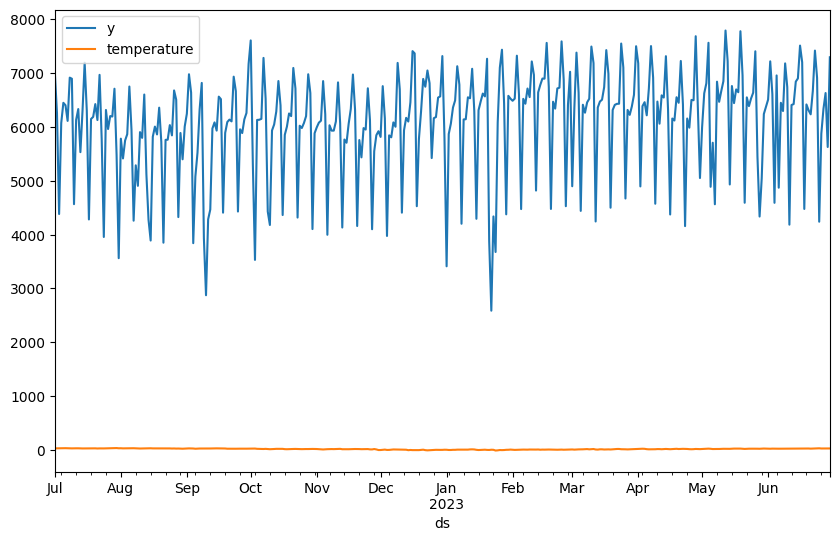

In [55]:
fig = df1.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))

In [56]:
set_random_seed(0)

# 기본 매개변수로 NeuralProphet 모델 생성
m = NeuralProphet(
    trend_reg=1, # 트렌드의 기울기(높을수록 기울기가 낮아짐)
    
#     n_changepoints=0,
    # Enable all seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
#     daily_seasonality=True,
#     n_lags=10,
#     n_forecasts=30
)
# m.set_plotting_backend("plotly")

# Add the new lagged regressor
m.add_lagged_regressor("temperature")

# Continue training the model and making a prediction
metrics = m.fit(df1)
forecast = m.predict(df1)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 279
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The

Finding best initial lr:   0%|          | 0/216 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 23it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


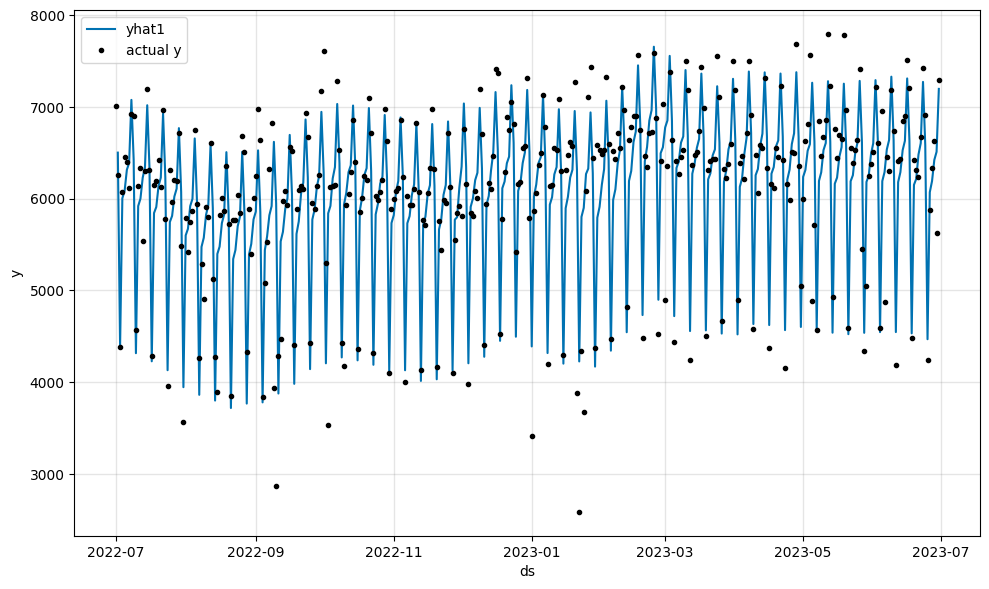

In [57]:
m.set_plotting_backend("matplotlib")
m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


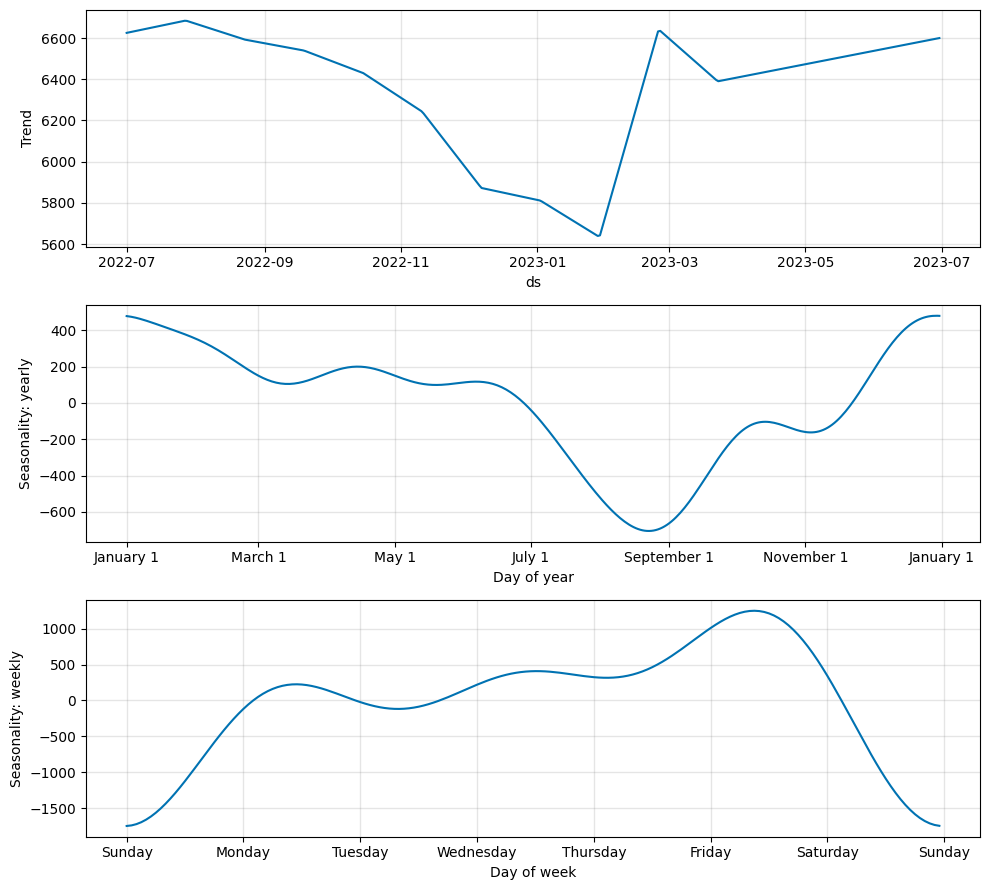

In [58]:
m.plot_parameters(components=["trend", "seasonality"])

In [62]:
forecast.head()

,ds,y,yhat1,lagged_regressor_temperature1,trend,season_yearly,season_weekly
0,2022-07-01,7006.0,NaN,NaN,NaN,NaN,NaN
1,2022-07-02,6260.0,6500.778320,-419.160492,6627.875977,-48.318825,340.382050
2,2022-07-03,4382.0,4389.748047,-428.544647,6630.138184,-61.816833,-1750.028809
3,2022-07-04,6074.0,6003.945312,-434.800812,6632.400391,-75.702324,-117.952011
4,2022-07-05,6449.0,6084.214844,-436.886139,6634.663086,-89.948616,-23.613155


In [73]:
# 검증 데이터에 대한 모델 성능 평가
df1.drop(df.index[0], inplace=True)
actual = df1['y'].values
# actual = df1_sampled['y'].values
forecast.dropna(inplace=True)
predicted = forecast['yhat1'].values  # 예측된 값의 열 이름에 따라 조정

mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f"평균 제곱 오차: {mse:.2f}")
print(f"평균 절대 오차: {mae:.2f}")

평균 제곱 오차: 253834.43
평균 절대 오차: 302.19
